In [5]:
import os 
import re
import cv2
import seaborn as sns 
import numpy as np
import imutils
import tensorflow as tf 
from tensorflow.keras import models 
from tensorflow.keras import layers 
from IPython.display import Image  # Note the correct casing in 'IPython'
import matplotlib.cm as cm 
from tqdm import tqdm
import matplotlib.pyplot as plt
barsize = '{l_bar}{bar:10}{r_bar}{bar:-10b}'

In [6]:
from imutils import paths 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

import tensorflow as tf 
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow.keras import Model, Sequential
from tensorflow.keras import layers 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.metrics as metrics

In [7]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15)
plt.rc('lines', linewidth = 3)
plt.rc('font', size = 15)

In [8]:
import random
random.seed(10)
np.random.seed(10)
tf.random.set_seed(10)

In [9]:
directory_test = r'C:\Users\Piyush Katole\Desktop\AI\xray model\chest_xray\test\NORMAL'
directory_train = r'C:\Users\Piyush Katole\Desktop\AI\xray model\chest_xray\train\NORMAL'
directory_val = r'C:\Users\Piyush Katole\Desktop\AI\xray model\chest_xray\val\NORMAL'
image_paths_norm = sorted(list(paths.list_images(directory_test))) + \
                   sorted(list(paths.list_images(directory_train))) + \
                   sorted(list(paths.list_images(directory_val)))

labels_norms = ['Normal'] * len(image_paths_norm)


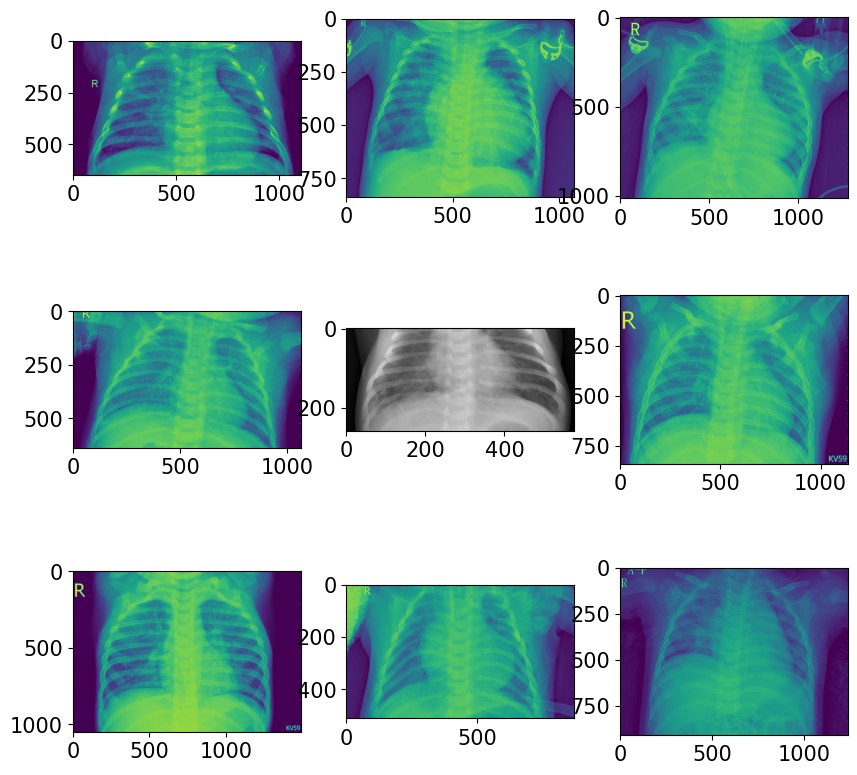

In [10]:
from matplotlib import pyplot 
from matplotlib.image import imread
import glob, random
folder = r'C:\Users\Piyush Katole\Desktop\AI\xray model\chest_xray\train\PNEUMONIA'

for i in range(9):
    pyplot.subplot(330 + 1 + i)
    
    all_files = glob.glob(folder + '/*.jpeg')
    
    images = glob.glob(random.choice(all_files))
    
    for j in images:
        image = imread(j)
        
    pyplot.imshow(image)
    
pyplot.show()    

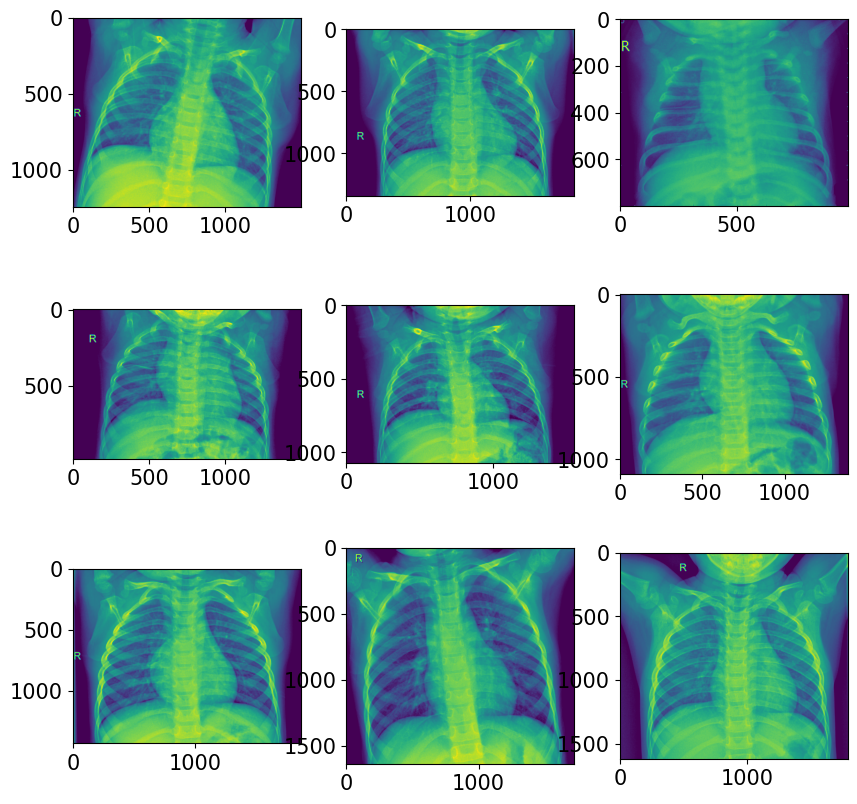

In [11]:
from matplotlib import pyplot 
from matplotlib.image import imread
import glob, random
folder = r'C:\Users\Piyush Katole\Desktop\AI\xray model\chest_xray\train\NORMAL'

for i in range(9):
    pyplot.subplot(330 + 1 + i)
    
    all_files = glob.glob(folder + '/*.jpeg')
    
    images = glob.glob(random.choice(all_files))
    
    for j in images:
        image = imread(j)
        
    pyplot.imshow(image)
    
pyplot.show()    

In [12]:
directory_test_pn = r'C:\Users\Piyush Katole\Desktop\AI\xray model\chest_xray\test\PNEUMONIA'
directory_train_pn = r'C:\Users\Piyush Katole\Desktop\AI\xray model\chest_xray\train\PNEUMONIA'
directory_val_pn = r'C:\Users\Piyush Katole\Desktop\AI\xray model\chest_xray\val\PNEUMONIA'
image_paths_norm_pn = sorted(list(paths.list_images(directory_test_pn))) + \
                   sorted(list(paths.list_images(directory_train_pn))) + \
                   sorted(list(paths.list_images(directory_val_pn)))

labels_pn = ['Pneumonia'] * len(image_paths_norm_pn)


In [13]:
image_paths = np.array(image_paths_norm + image_paths_norm_pn)
labels = np.concatenate((labels_norms, labels_pn))

In [14]:
directory_test_pn

'C:\\Users\\Piyush Katole\\Desktop\\AI\\xray model\\chest_xray\\test\\PNEUMONIA'

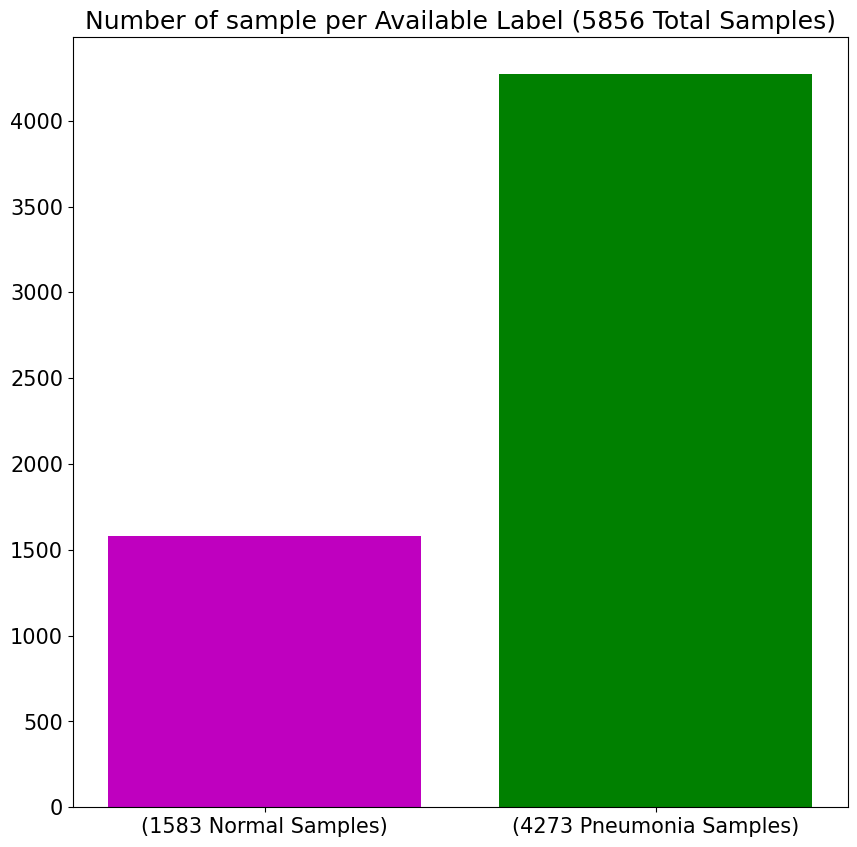

In [15]:
plt.bar([1, 2], height=[len(labels_norms), len(labels_pn)], tick_label = ['({0:d} Normal Samples)'.format(len(labels_norms)), 
                                                                         '({0:d} Pneumonia Samples)'.format(len(labels_pn))],
                                                           color = ['m', 'g'])
plt.title("Number of sample per Available Label ({0:d} Total Samples)".
         format(len(labels_norms) + len(labels_pn)))

plt.show()

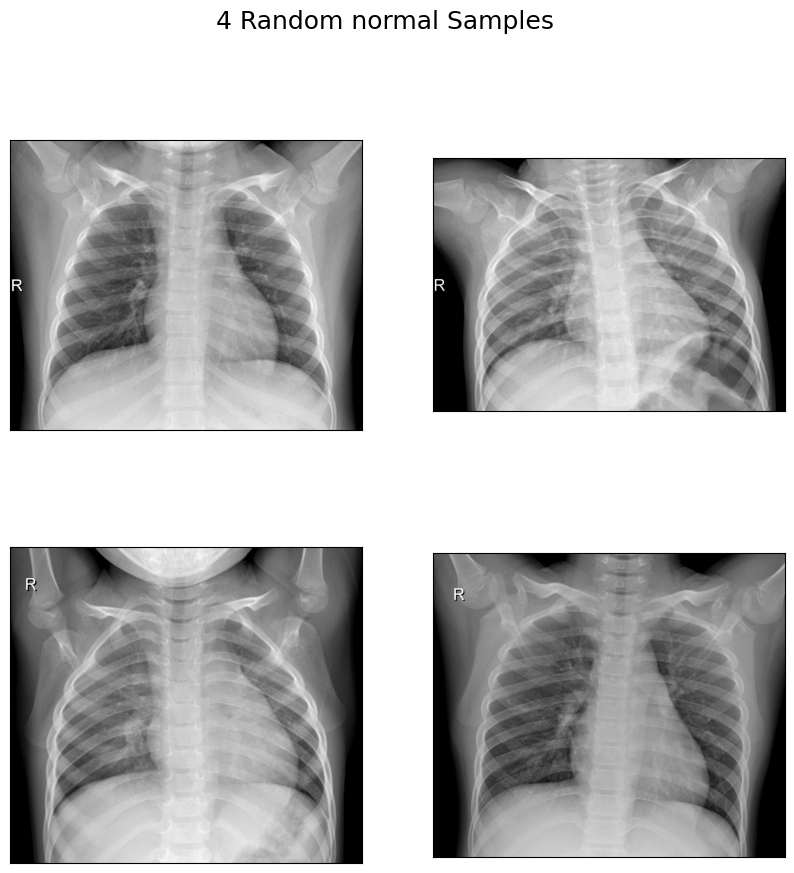

In [16]:
rows, columns = 2, 2
fig, axes = plt.subplots(rows, columns)

norm_indices = np.random.choice(len(image_paths_norm), rows * columns)
pn_indices = np.random.choice(len(image_paths_norm_pn), rows * columns)

imgs_to_plot_norms = [image_paths_norm[i] for i in norm_indices]
imgs_to_plot_pn = [image_paths_norm_pn[i] for i in pn_indices]

current_index = 0

fig.suptitle('4 Random normal Samples')

for i in range(rows):
    for j in range(columns):
        img = load_img(imgs_to_plot_norms[current_index])
        axes[i, j].imshow(img)
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
        current_index += 1

plt.show()

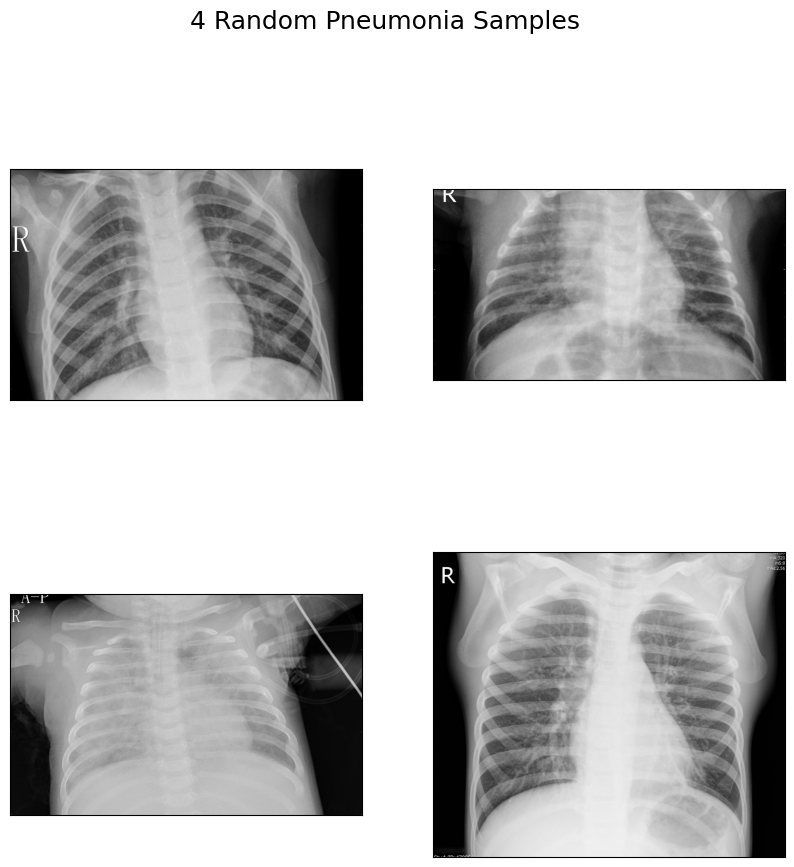

In [17]:
fig, axes = plt.subplots(rows, columns)

current_index = 0

fig.suptitle('4 Random Pneumonia Samples')

for i in range(rows):
    for j in range(columns):
        img = load_img(imgs_to_plot_pn[current_index])
        axes[i, j].imshow(img)
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
        current_index += 1

plt.show()

In [18]:
from sklearn.model_selection import train_test_split

X_train_dir, X_test_dir, y_train, y_test =\
                                           train_test_split(image_paths, labels, test_size = 0.3)

X_val_dir, y_val = X_test_dir[:len(X_test_dir) // 2], \
                   y_test[:len(y_test) // 2]

In [19]:
import pandas as pd

train_df = pd.DataFrame({'filename': X_train_dir, 'class': y_train})
val_df = pd.DataFrame({'filename': X_val_dir, 'class': y_val})
test_df = pd.DataFrame({'filename': X_test_dir, 'class': y_test})




In [20]:
print(len(X_val_dir))
print(len(y_val))


878
878


In [21]:
BATCH_SIZE = 32 

datagen = ImageDataGenerator(rescale = 1./255, 
                            zoom_range = 0.1,
                            height_shift_range = 0.05,
                            width_shift_range = 0.05,
                            rotation_range = 5)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_gen = datagen.flow_from_dataframe(train_df,
                                       target_size = (512,512),
                                       color_mode = 'grayscale',
                                       batch_size = BATCH_SIZE,
                                       class_mode = 'binary',
                                       shuffle = True)

val_gen = test_datagen.flow_from_dataframe(val_df,
                                       target_size = (512,512),
                                       color_mode = 'grayscale',
                                       batch_size = BATCH_SIZE,
                                       class_mode = 'binary',
                                       shuffle = True)

test_gen = test_datagen.flow_from_dataframe(test_df,
                                       target_size = (512,512),
                                       color_mode = 'grayscale',
                                       batch_size = BATCH_SIZE,
                                       class_mode = 'binary',
                                       shuffle = True)



Found 4099 validated image filenames belonging to 2 classes.
Found 878 validated image filenames belonging to 2 classes.
Found 1757 validated image filenames belonging to 2 classes.


In [22]:
import tensorflow as tf

# Assuming train_gen, val_gen, test_gen are your generator functions

# Define the output signature
output_signature = (
    tf.TensorSpec(shape=[None, 512, 512, 1], dtype=tf.float32),
    tf.TensorSpec(shape=[None], dtype=tf.int32)
)

# Create datasets with output signature
train_data = tf.data.Dataset.from_generator(lambda: train_gen, output_signature=output_signature)
val_data = tf.data.Dataset.from_generator(lambda: val_gen, output_signature=output_signature)
test_data = tf.data.Dataset.from_generator(lambda: test_gen, output_signature=output_signature)


In [23]:
images_to_augment = []

for image_path in image_paths[:4]:
    image = load_img(image_path, target_size = (512, 512))
    image = img_to_array(image)
    images_to_augment.append(image)
    
images_to_augment = np.array(images_to_augment)

images_augmented = next(datagen.flow(x=images_to_augment,
                                    batch_size=10, 
                                    shuffle = False))

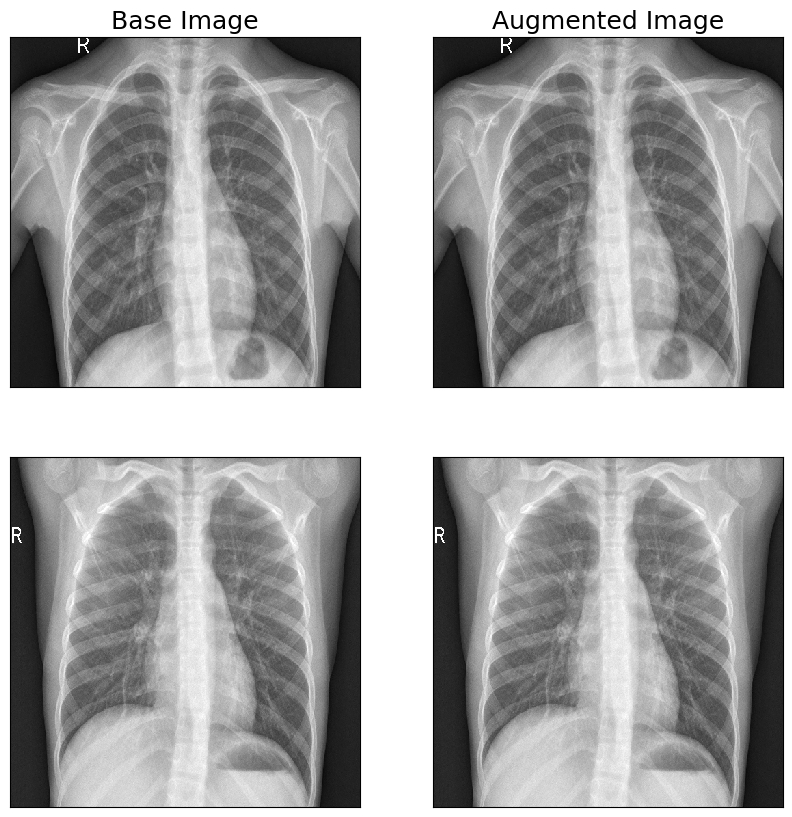

In [24]:
from tensorflow.keras.preprocessing.image import array_to_img

fig, axes = plt.subplots(2, 2)

for i in range(2):
    axes[i, 0].imshow(array_to_img(images_to_augment[i]),
                     interpolation = 'nearest')
    
    axes[i, 1].imshow(array_to_img(images_to_augment[i]),
                     interpolation = 'nearest')
    
    axes[i, 0].set_xticks([])
    axes[i, 1].set_xticks([])
        
    axes[i, 0].set_yticks([])
    axes[i, 1].set_yticks([])
    
columns = ['Base Image', 'Augmented Image'] 
for ax, column in zip(axes[0], columns):
    ax.set_title(column)
    
plt.show()    

In [25]:
def feed_data(dataset):
    
    dataset= dataset.prefetch(buffer_size = tf.data.experimental.AUTOTUNE)
    
    return dataset

In [26]:
def create_model():
    
    input_layer = layers.Input(shape = (512, 512, 1), name='input')
    
    #First block 
    x = layers.Conv2D(filters = 64,kernel_size = 3,
                     activation = 'relu', padding = 'same',
                     name = 'conv2d_1')(input_layer)
    
    x = layers.MaxPooling2D(pool_size = 2, name = 'maxpool2d_1')(x)
    x = layers.Dropout(0.1, name = 'dropout_1')(x)
    
    #second block 
    x = layers.Conv2D(filters = 96,kernel_size = 3,
                     activation = 'relu', padding = 'same',
                     name = 'conv2d_2')(x)
    
    x = layers.MaxPooling2D(pool_size = 2, name = 'maxpool2d_2')(x)
    x = layers.Dropout(0.1, name = 'dropout_2')(x)
    
    #third block 
    x = layers.Conv2D(filters = 128,kernel_size = 3,
                     activation = 'relu', padding = 'same',
                     name = 'conv2d_3')(x)
    
    x = layers.MaxPooling2D(pool_size = 2, name = 'maxpool2d_3')(x)
    x = layers.Dropout(0.1, name = 'dropout_3')(x)
    
    #fourth block 
    x = layers.Conv2D(filters = 160,kernel_size = 3,
                     activation = 'relu', padding = 'same',
                     name = 'conv2d_4')(x)
    
    x = layers.MaxPooling2D(pool_size = 2, name = 'maxpool2d_4')(x)
    x = layers.Dropout(0.1, name = 'dropout_4')(x)
    
    #fifth block 
    x = layers.Conv2D(filters = 192,kernel_size = 3,
                     activation = 'relu', padding = 'same',
                     name = 'conv2d_5')(x)
    
    x = layers.MaxPooling2D(pool_size = 2, name = 'maxpool2d_5')(x)
    x = layers.Dropout(0.1, name = 'dropout_5')(x)
    
    #sixth block 
    x = layers.Conv2D(filters = 224,kernel_size = 3,
                     activation = 'relu', padding = 'same',
                     name = 'conv2d_6')(x)
    
    x = layers.MaxPooling2D(pool_size = 2, name = 'maxpool2d_6')(x)
    x = layers.Dropout(0.1, name = 'dropout_6')(x)
    
    #seventh block 
    x = layers.Conv2D(filters = 256,kernel_size = 3,
                     activation = 'relu', padding = 'same',
                     name = 'conv2d_7')(x)
    
    x = layers.MaxPooling2D(pool_size = 2, name = 'maxpool2d_7')(x)
    x = layers.Dropout(0.1, name = 'dropout_7')(x)
    
    #pooling and output
    x = layers.GlobalAveragePooling2D(name = 'global_average_pooling2d')(x)
    output = layers.Dense(units = 1,
                         activation = 'sigmoid',
                         name = 'output')(x)
    
    #model creation and compilation
    
    model = Model(input_layer, output)
    model.compile(optimizer = 'adam',
                 loss = 'binary_crossentropy',
                 metrics= ['accuracy'])
    
    return model
    

In [27]:
model = create_model()

In [28]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 512, 512, 1)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 512, 512, 64)      640       
                                                                 
 maxpool2d_1 (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 dropout_1 (Dropout)         (None, 256, 256, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 96)      55392     
                                                                 
 maxpool2d_2 (MaxPooling2D)  (None, 128, 128, 96)      0         
                                                                 
 dropout_2 (Dropout)         (None, 128, 128, 96)      0     

In [29]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [30]:
def lr_decay(epoch):
    
    intial_lr = 0.001
    lr = intial_lr * np.exp(-0.1 * epoch)
    return lr 

In [31]:
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, LearningRateScheduler

lr_scheduler = LearningRateScheduler(lr_decay, 1)
csv_logger = CSVLogger(filename='Covid_x-ray_CNN_7-layer_double_adam_512_aug_bn_dropout01_explr.csv')
model_checkpoint = ModelCheckpoint(
          filepath = 'Covid_x-ray_CNN_7-layer_double_adam_512_aug_bn_dropout01_explr_{epoch:04d}_{val_loss:04f}.hdf5',
          monitor = 'val_loss',
          verbose = 0,
          save_best_only = True,
          save_weights_only = True,
          mode ='min',
          save_freq = 'epoch')

In [32]:
train_steps = train_gen.samples // BATCH_SIZE
val_steps = val_gen.samples // BATCH_SIZE

In [33]:
train_data

<_FlatMapDataset element_spec=(TensorSpec(shape=(None, 512, 512, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [34]:
history = model.fit(feed_data(train_data),
                   epochs = 3,
                   steps_per_epoch = train_steps,
                   validation_data = (feed_data(val_data)),
                   validation_steps = val_steps,
                   shuffle = True,
                   callbacks = [lr_scheduler, csv_logger, model_checkpoint])



Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/3
128/128 [==============================] - 1244s 10s/step - loss: 0.5320 - accuracy: 0.7327 - val_loss: 0.4213 - val_accuracy: 0.7176 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009048374180359595.
Epoch 2/3
128/128 [==============================] - 1184s 9s/step - loss: 0.4016 - accuracy: 0.7829 - val_loss: 0.3509 - val_accuracy: 0.8426 - lr: 9.0484e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0008187307530779819.
Epoch 3/3
128/128 [==============================] - 1170s 9s/step - loss: 0.3348 - accuracy: 0.8596 - val_loss: 0.2520 - val_accuracy: 0.9028 - lr: 8.1873e-04


In [35]:

model = create_model()


In [36]:
model.load_weights("Covid_x-ray_CNN_7-layer_double_adam_512_aug_bn_dropout01_explr_0003_0.251989.hdf5")

In [37]:
test_df

,filename,class
0,C:\Users\Piyush Katole\Desktop\AI\xray model\c...,Pneumonia
1,C:\Users\Piyush Katole\Desktop\AI\xray model\c...,Pneumonia
2,C:\Users\Piyush Katole\Desktop\AI\xray model\c...,Pneumonia
3,C:\Users\Piyush Katole\Desktop\AI\xray model\c...,Pneumonia
4,C:\Users\Piyush Katole\Desktop\AI\xray model\c...,Pneumonia
...,...,...
1752,C:\Users\Piyush Katole\Desktop\AI\xray model\c...,Pneumonia
1753,C:\Users\Piyush Katole\Desktop\AI\xray model\c...,Pneumonia
1754,C:\Users\Piyush Katole\Desktop\AI\xray model\c...,Pneumonia
1755,C:\Users\Piyush Katole\Desktop\AI\xray model\c...,Pneumonia


In [38]:
test_steps = test_gen.samples // BATCH_SIZE
model.evaluate(test_data, steps = test_steps)

test_aug_gen = datagen.flow_from_dataframe(test_df,
                                          target_size= (512, 512),
                                          color_mode = 'grayscale',
                                          batch_size = BATCH_SIZE,
                                          class_mode = 'binary',
                                          shuffle = False )

test_aug_data = tf.data.Dataset.from_generator(lambda: test_aug_gen,
                                              output_types =(tf.float32, tf.int32),
                                              output_shapes = ([None, 512, 512, 1], [None, ]))

test_aug_steps = test_aug_gen.samples // BATCH_SIZE
model.evaluate(test_aug_data, steps = test_aug_steps)
                                           

54/54 [==============================] - 89s 2s/step - loss: 0.2483 - accuracy: 0.9080
Found 1757 validated image filenames belonging to 2 classes.
54/54 [==============================] - 89s 2s/step - loss: 0.2851 - accuracy: 0.9034


[0.28505444526672363, 0.9033564925193787]

In [39]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()

predictions = model.predict(test_data, steps= test_steps).flatten()
y_true = test_gen.classes[:len(predictions)]

precision.update_state(y_true, predictions)
recall.update_state(y_true, predictions)

54/54 [==============================] - 88s 2s/step


In [40]:
print('Precision with base test data: ', precision.result().numpy())
print('recall with base test data: ', recall.result().numpy())

Precision with base test data:  0.71993273
recall with base test data:  0.68865645


In [41]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_true, predictions > 0.5)

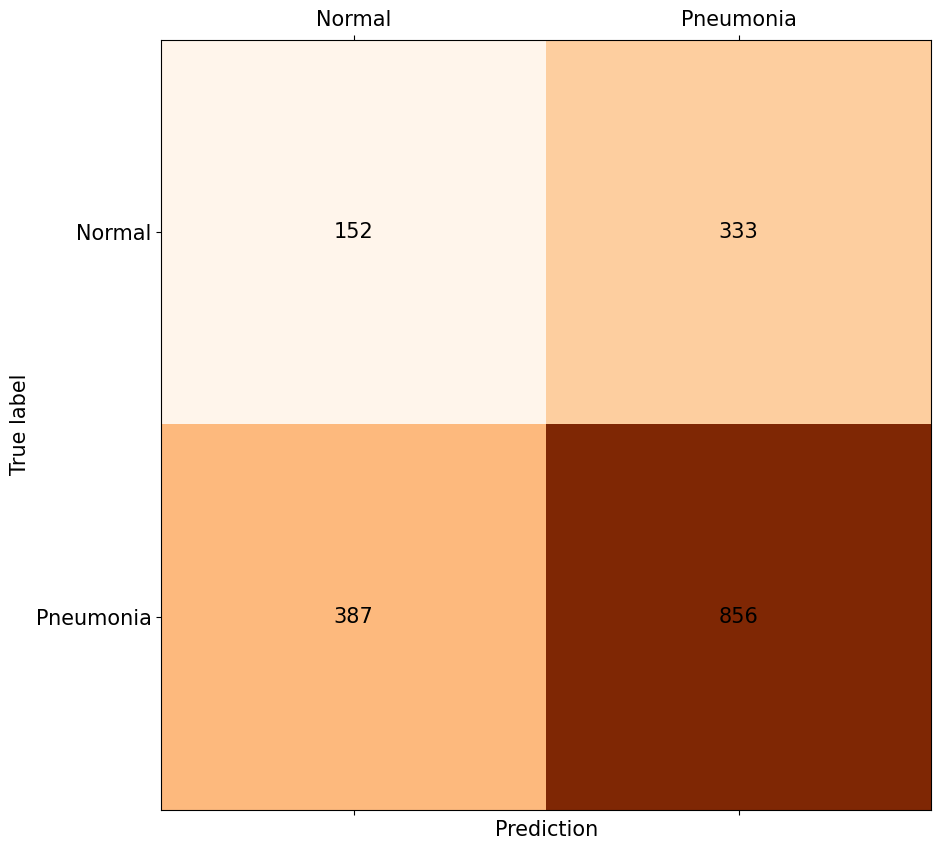

In [42]:
fig, ax = plt.subplots()

ax.matshow(confusion_mat, cmap = plt.cm.Oranges)

ax.set_xlabel('Prediction')
ax.set_ylabel('True label')

tick_labels = ['Normal', 'Pneumonia']

ax.set_xticks(range(len(tick_labels)))
ax.set_yticks(range(len(tick_labels)))
ax.set_xticklabels(tick_labels)
ax.set_yticklabels(tick_labels) 
              
for i in range (len(tick_labels)):
    for j in range (len(tick_labels)):
              ax.text(j, i, confusion_mat[i, j],
                     ha = 'center', va='center')
              
plt.show()              
              
              

In [52]:
from tensorflow.keras.preprocessing.image import array_to_img

def plot_image(image, prediction, label):
    
    label_names = ['Normal', 'Pneumonia']
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(array_to_img(image * 255), interpolation = 'nearest', cmap= 'gray')
    
    if prediction <= 0.5 :
        prediction_label = 0
    else :
        prediction_label = 1
        
    if prediction_label == label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% \n ({})".format(label_names[prediction_label], 100 * prediction[0], label_names[label] ), color=color)


1/1 [==============================] - 2s 2s/step


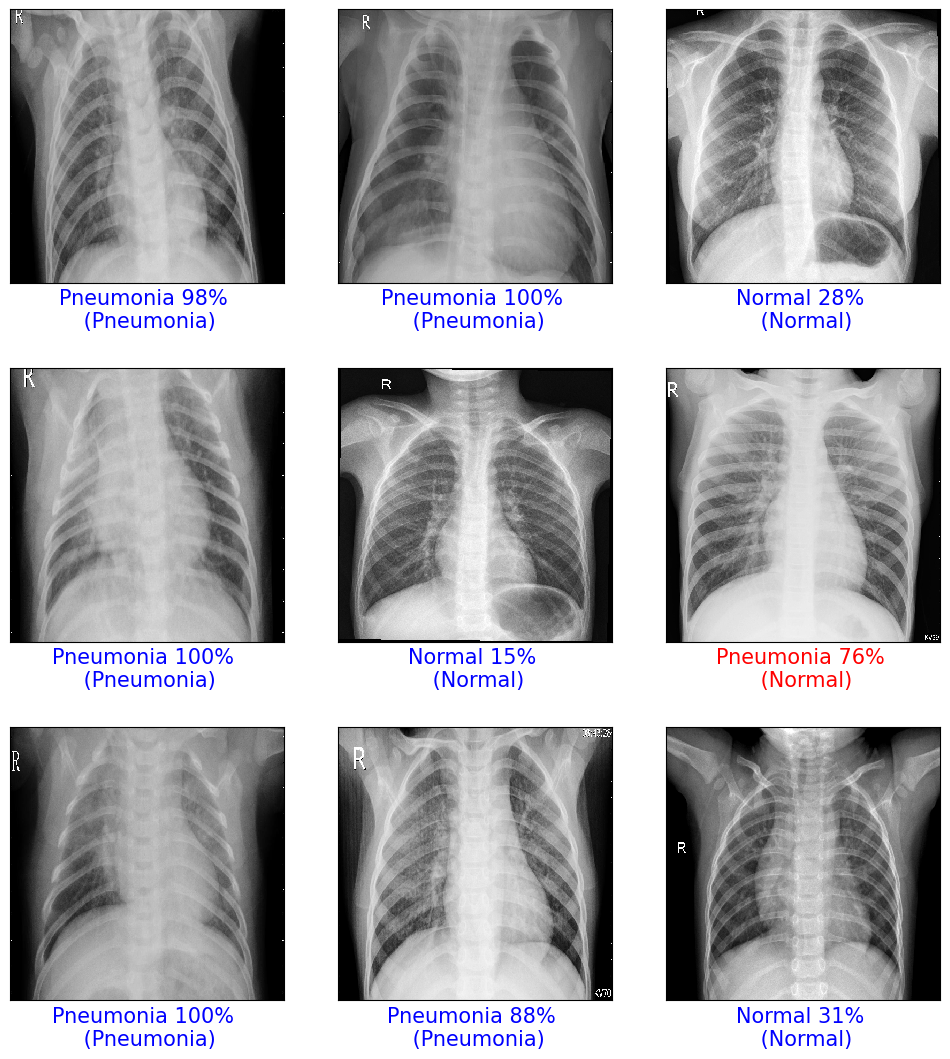

In [55]:
images, labels = next(iter(test_data))
y_pred = model.predict(images)
num_rows = 3
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize = (2*2*num_cols, 2.2*2*num_rows))

for i in range (num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(images[i], y_pred[i], labels[i])
plt.show()    